# Exploratory Data Analysis (EDA)

Again, we import pandas as usual

In [1]:
import pandas as pd

and loaded the data in again

In [2]:
coffee_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/robusta_data_cleaned.csv'
coffee_df = pd.read_csv(coffee_data_url,index_col=0)

### Summarizing and Visualizing Data are **very** important

- People cannot interpret high dimensional or large samples quickly
- Important in EDA to help you make decisions about the rest of your analysis
- Important in how you report your results
- Summaries are similar calculations to performance metrics we will see later
- visualizations are often essential in debugging models


**THEREFORE**
- You have  [a lot of chances](https://rhodyprog4ds.github.io/BrownSpring23/syllabus/achievements.html#assignments-and-skills) to earn summarize and visualize
- we will be picky when we assess if you earned them or not


## Describing a Dataset

So far, we've loaded data in a few different ways and then we've examined
DataFrames as a data structure, looking at what different attributes they have
and what some of the methods are, and how to get data into them.

We can also get more structural information with the [`info`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) method.

In [3]:
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 1 to 28
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                28 non-null     object 
 1   Owner                  28 non-null     object 
 2   Country.of.Origin      28 non-null     object 
 3   Farm.Name              25 non-null     object 
 4   Lot.Number             6 non-null      object 
 5   Mill                   20 non-null     object 
 6   ICO.Number             17 non-null     object 
 7   Company                28 non-null     object 
 8   Altitude               25 non-null     object 
 9   Region                 26 non-null     object 
 10  Producer               26 non-null     object 
 11  Number.of.Bags         28 non-null     int64  
 12  Bag.Weight             28 non-null     object 
 13  In.Country.Partner     28 non-null     object 
 14  Harvest.Year           28 non-null     int64  
 15  Grading.

Now, we can actually start to analyze the data itself.

The [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method provides us with a set of summary statistics that broadly
describe the data overall.

In [4]:
coffee_df.describe()

,Number.of.Bags,Harvest.Year,Fragrance...Aroma,Flavor,Aftertaste,Salt...Acid,Bitter...Sweet,Mouthfeel,Uniform.Cup,Clean.Cup,Balance,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,25.00000,25.000000,25.000000
mean,168.000000,2013.964286,7.702500,7.630714,7.559643,7.657143,7.675714,7.506786,9.904286,9.928214,7.541786,7.761429,80.868929,0.065714,2.964286,0.0,1.892857,1367.60000,1387.600000,1377.600000
std,143.226317,1.346660,0.296156,0.303656,0.342469,0.261773,0.317063,0.725152,0.238753,0.211030,0.526076,0.330507,2.441233,0.058464,12.357280,0.0,2.601129,838.06205,831.884207,833.980216
min,1.000000,2012.000000,6.750000,6.670000,6.500000,6.830000,6.670000,5.080000,9.330000,9.330000,5.250000,6.920000,73.750000,0.000000,0.000000,0.0,0.000000,40.00000,40.000000,40.000000
25%,1.000000,2013.000000,7.580000,7.560000,7.397500,7.560000,7.580000,7.500000,10.000000,10.000000,7.500000,7.580000,80.170000,0.000000,0.000000,0.0,0.000000,795.00000,795.000000,795.000000
50%,170.000000,2014.000000,7.670000,7.710000,7.670000,7.710000,7.750000,7.670000,10.000000,10.000000,7.670000,7.830000,81.500000,0.100000,0.000000,0.0,1.000000,1095.00000,1200.000000,1100.000000
75%,320.000000,2015.000000,7.920000,7.830000,7.770000,7.830000,7.830000,7.830000,10.000000,10.000000,7.830000,7.920000,82.520000,0.120000,0.000000,0.0,2.000000,1488.00000,1488.000000,1488.000000
max,320.000000,2017.000000,8.330000,8.080000,7.920000,8.000000,8.420000,8.250000,10.000000,10.000000,8.000000,8.580000,83.750000,0.130000,63.000000,0.0,9.000000,3170.00000,3170.000000,3170.000000


````{margin}
```{admonition} further reading
On the [documentation page for describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) the "<i class="fas fa-info-circle"></i>
 See Also" shows the links to the documentation of most of the individual functions.  This is a good way to learn about other things, or find something when you are not quite sure what it would be named.  Go to a function thats similar to what you want and then look at the related functions.
```
````

From this, we can draw several conclusions.  FOr example straightforward ones like:
- the smallest number of bags rated is 1 and at least 25% of the coffees rates only had 1 bag
- the first ratings included were 2012 and last in 2017  (min & max)
- the mean Mouthfeel was 7.5
- Category One defects are not very common ( the 75th% is 0)

Or more nuanced ones that compare across variables like
- the raters scored coffee higher on Uniformity.Cup and Clean.Cup than other scores (mean score; only on the ones that seem to have a scale of up to 8/10)
- the coffee varied more in Mouthfeel and Balance that most other scores (the std; only on the ones that seem to have a scale of of up to 8/10)
- there are 3 ratings with no altitude (count of other variables is 28; alt is 25

And these all give us a sense of the values and the distribution or spread fo the data in each column.


We can use the descriptive statistics on individual columns as well.



### Understanding Quantiles

The 50% has another more common name: the median.  It means 50% of the data are lower (and higher) than this value.  

%25 i sthe number that 25% of the data is less than
%75 is the number that 75% of the data is less than


We can use the descriptive statistics on individual columns as well.

In [5]:
coffee_df['Uniform.Cup'].describe()

count    28.000000
mean      9.904286
std       0.238753
min       9.330000
25%      10.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: Uniform.Cup, dtype: float64

In [6]:
coffee_df[['Uniform.Cup','Mouthfeel']].describe()

,Uniform.Cup,Mouthfeel
count,28.000000,28.000000
mean,9.904286,7.506786
std,0.238753,0.725152
min,9.330000,5.080000
25%,10.000000,7.500000
50%,10.000000,7.670000
75%,10.000000,7.830000
max,10.000000,8.250000


## Individual statistics
We can also extract each of the statistics that the `describe` method calculates individually, by name.  The quantiles
are tricky, we cannot just `.25%()` to get the 25% percentile, we have to use the
`quantile` method and pass it a value between 0 and 1.

In [7]:
coffee_df.mean(numeric_only=True)

Number.of.Bags           168.000000
Harvest.Year            2013.964286
Fragrance...Aroma          7.702500
Flavor                     7.630714
Aftertaste                 7.559643
Salt...Acid                7.657143
Bitter...Sweet             7.675714
Mouthfeel                  7.506786
Uniform.Cup                9.904286
Clean.Cup                  9.928214
Balance                    7.541786
Cupper.Points              7.761429
Total.Cup.Points          80.868929
Moisture                   0.065714
Category.One.Defects       2.964286
Quakers                    0.000000
Category.Two.Defects       1.892857
altitude_low_meters     1367.600000
altitude_high_meters    1387.600000
altitude_mean_meters    1377.600000
dtype: float64

In [8]:
coffee_df['Flavor'].quantile(.8)

7.83

In [9]:
coffee_df['Aftertaste'].mean()

7.559642857142856

In [10]:
coffee_df.head(2)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1,Robusta,ankole coffee producers coop,Uganda,kyangundu cooperative society,NaN,ankole coffee producers,0,ankole coffee producers coop,1488,sheema south western,...,Green,2,"June 26th, 2015",Uganda Coffee Development Authority,e36d0270932c3b657e96b7b0278dfd85dc0fe743,03077a1c6bac60e6f514691634a7f6eb5c85aae8,m,1488.0,1488.0,1488.0
2,Robusta,nishant gurjer,India,sethuraman estate kaapi royale,25,sethuraman estate,14/1148/2017/21,kaapi royale,3170,chikmagalur karnataka indua,...,NaN,2,"October 31st, 2018",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,3170.0,3170.0,3170.0


## Working with categorical data
There are different columns in the describe than the the whole dataset:

In [11]:
coffee_df.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method',
       'Fragrance...Aroma', 'Flavor', 'Aftertaste', 'Salt...Acid',
       'Bitter...Sweet', 'Mouthfeel', 'Uniform.Cup', 'Clean.Cup', 'Balance',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture', 'Category.One.Defects',
       'Quakers', 'Color', 'Category.Two.Defects', 'Expiration',
       'Certification.Body', 'Certification.Address', 'Certification.Contact',
       'unit_of_measurement', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

In [12]:
coffee_df.describe().columns

Index(['Number.of.Bags', 'Harvest.Year', 'Fragrance...Aroma', 'Flavor',
       'Aftertaste', 'Salt...Acid', 'Bitter...Sweet', 'Mouthfeel',
       'Uniform.Cup', 'Clean.Cup', 'Balance', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Category.Two.Defects', 'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'],
      dtype='object')

We can get the prevalence of each one with `value_counts`

In [13]:
coffee_df['Color'].value_counts()

Green           20
Blue-Green       3
Bluish-Green     2
None             1
Name: Color, dtype: int64

```{admonition} Try it Yourself
Note `value_counts` does not count the `NaN` values, but `count` counts all of the
not missing values and the shape of the DataFrame is the total number of rows.
How can you get the number of missing Colors?
```

Describe only operates on the numerical columns, but we might want to know about the others.  We can get the number of each value with `value_counts`

In [14]:
coffee_df['Country.of.Origin'].value_counts()

India            13
Uganda           10
United States     2
Ecuador           2
Vietnam           1
Name: Country.of.Origin, dtype: int64

Value counts returns a pandas Series that has two parts: values and index

In [15]:
coffee_df['Country.of.Origin'].value_counts().values

array([13, 10,  2,  2,  1])

In [16]:
coffee_df['Country.of.Origin'].value_counts().index

Index(['India', 'Uganda', 'United States', 'Ecuador', 'Vietnam'], dtype='object')

The max takes the max of the values.

In [17]:
coffee_df['Country.of.Origin'].value_counts().max()

13

We can get the name of the most common country out of this Series using `idmax`

In [18]:
type(coffee_df['Country.of.Origin'].value_counts())

pandas.core.series.Series

Or see only how many different values with the related:

In [19]:
coffee_df['Country.of.Origin'].nunique()

5

## Split-Apply-Combine 

So, we can summarize data now, but the summaries we have done so far have treated each variable one at a time.  The most interesting patterns are in often in how multiple variables interact. We'll do some modeling that looks at multivariate functions of data in a few weeks, but for now, we do a little more with summary statistics.

 For example, how does the flavor ratings relate to the country?

In [20]:
coffee_df.groupby('Country.of.Origin')['Flavor'].describe()

,count,mean,std,min,25%,50%,75%,max
Country.of.Origin,,,,,,,,
Ecuador,2.0,7.625000,0.063640,7.58,7.6025,7.625,7.6475,7.67
India,13.0,7.640769,0.279835,6.83,7.5800,7.750,7.7500,7.92
Uganda,10.0,7.758000,0.197754,7.42,7.6025,7.790,7.8975,8.08
United States,2.0,7.415000,0.120208,7.33,7.3725,7.415,7.4575,7.50
Vietnam,1.0,6.670000,NaN,6.67,6.6700,6.670,6.6700,6.67


Above we saw which country had the most ratings (remember one row is one rating), but what if we wanted to see the mean number of bags per country?

In [21]:
coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].mean()

Country.of.Origin
Ecuador            1.000000
India            230.076923
Uganda           160.900000
United States     50.500000
Vietnam            1.000000
Name: Number.of.Bags, dtype: float64

```{important}
This data is only about coffee that was [rated by a particular agency](https://github.com/jldbc/coffee-quality-database/) it is not economic data, so we cannot, for example conclude which country *produces* the amount of data.  If we had economic dataset, a `Number.of.Bags` columns's mean would tell us exactly that, but the context of the dataset defines what a row means and therefore how we can interpret the **every single statistic** we calculate.
```


What just happened?
![split-apply-combine image showing one data table, it split into 3 part, the sum applied to each part, and the sums combined back into one table](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

Groupby splits the whole dataframe into parts where each part has the same value for `Country.of.Origin` and then after that, we extracted the `Number.of.Bags` column, took the sum (within each separate group) and then put it all back together in one table (in this case, a `Series` becuase we picked one variable out)

(groupby-detail)=
### How does Groupby Work?
```{important}
This is more details with code examples on how the groupby works.  If you want
to run this code for yourself, use the download icon at the top right to download
these notes as a notebook.
```

We can view this by saving the groupby object as a variable and exploring it.

In [22]:
country_grouped = coffee_df.groupby('Country.of.Origin')

country_grouped

Trying to look at it without applying additional functions, just tells us the type.  But, it's iterable, so we can loop over.

In [23]:
for country,df in country_grouped:
    print(type(country), type(df))

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>


````{margin}
```{note}
I used this feature to build the separate view of the communication channels on this website.  You can view that source using the github icon on that page.
```
````

We could manually compute things using the data structure, if needed, though using pandas functionality will usually do what we want. For example:

````{margin}
```{note}
I tried putting this dictionary into the dataframe for display purposes using the regular constructor and got an error, so I googled about making one from a dictionary to get the docs, which is how I learned about the [`from_dict`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html) method and its `orient` parameter which solved my problems.
```
````

In [24]:
bag_total_dict = {}

for country,df in country_grouped:
    tot_bags =  df['Number.of.Bags'].sum()
    bag_total_dict[country] = tot_bags

pd.DataFrame.from_dict(bag_total_dict, orient='index',
                           columns = ['Number.of.Bags.Sum'])

,Number.of.Bags.Sum
Ecuador,2
India,2991
Uganda,1609
United States,101
Vietnam,1


is the same as what we did before




## Plotting with Pandas 

<!-- ```{code-cell} ipython3
%matplotlib inline
``` -->

Pandas allows us to do basic plots on a `DataFrame` or `Series` with the `plot` method.  

We want bars so we will use the `kind` parameter to switch it.

<AxesSubplot: xlabel='Country.of.Origin'>

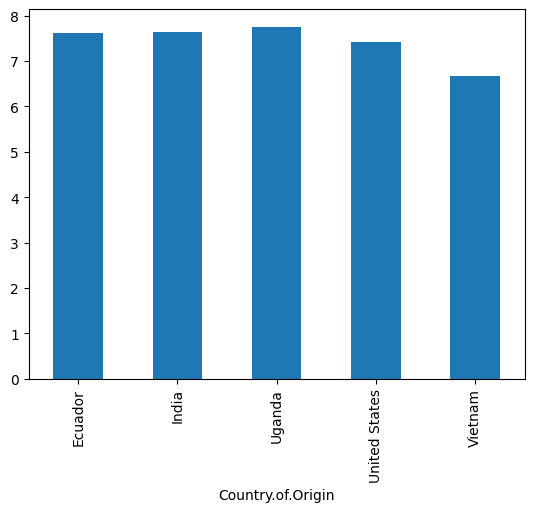

In [25]:
coffee_df.groupby('Country.of.Origin')['Flavor'].mean().plot(kind='bar')

It can also be done on a dataframe like this

<AxesSubplot: xlabel='Country.of.Origin'>

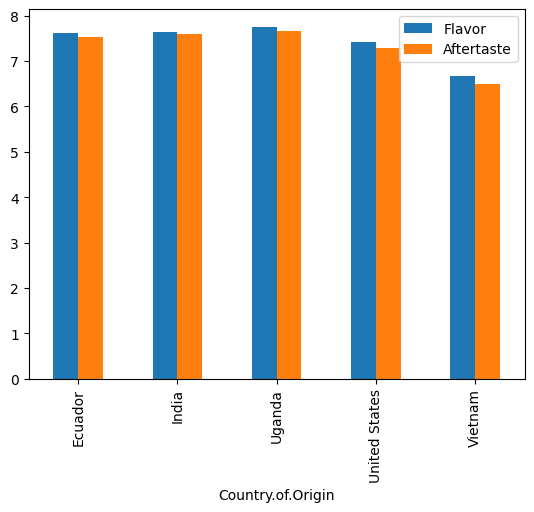

In [26]:
coffee_df.groupby('Country.of.Origin')[['Flavor','Aftertaste']].mean().plot(kind='bar')

Note that it adds a legend for us and uses two colors. 

```{admonition} What is the default plot type
:class: anchor

Try removing the `kind=bar` and see what it does
```

## Questions after Class

### Are there any calls for examples such as.plot or .describe that you do not want us to use?

Everything in pandas is welcome, unless it is deprecated or not recommended by pandas. Pandas will tell, like the FutureWarning that we saw today. Work will be accepted with warnings, most of the time but it is not best practice and some that I specifically tell you to avoid as we encounter them will not be accepted. 

### What keyboard key do you use to run the code so I don't have to use the mouse?

hold shift, press enter

### How do we take the plots and save them to a separate file?

We will need an additional library to do this, we will do that on Thursday. 

### how do you display different types of charts

the `kind` attribute can change to differen types

### When you give feedback on an assignment is there a way to fix it to get the points you said it did not meet?

No, you can attempt in the next assignment or portfolio check. 

### I want to know more about the limitations of pandas 

pandas is relatively slow and cannot use accelerated hardware very well.  However it is still good to learn because it has gained a lot of traction. So much so that in [`modin`](https://docs.ray.io/en/latest/data/modin/index.html) you can change one line of code to get those advantages. 

### Can Jupyter use other graphics software?

Jupyter notebooks are a file(roughly a json). You can edit it using any text editor. You can also convert to a plain text files using [`jupytext`](https://github.com/mwouts/jupytext) that is still runnable. 

### How do we generate different models as done in r, also is there a supernova function?

R is designed by and for statisticians.  Most of the calculations can be done. They may be slightly more clunky in Python than R.  

### I had a question on the assignment, in the datasets.py file were we were supposed to save a function handle, should it be a function object or a string?

function object

### Besides accepting the invite, is there any more setup we were supposed to do with the achievement tracker repository?

No, that's it.